In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"E:\elevatetrsest\dataset\price_wheat_daily.csv")

In [4]:
df.head()

date  district_id district_name commodity_name   state_name  \
0  2025-03-07          497     Nandurbar          Wheat  Maharashtra   
1  2025-03-06          497     Nandurbar          Wheat  Maharashtra   
2  2025-03-05          497     Nandurbar          Wheat  Maharashtra   
3  2025-03-04          497     Nandurbar          Wheat  Maharashtra   
4  2025-03-03          497     Nandurbar          Wheat  Maharashtra   

   avg_modal_price  avg_min_price  avg_max_price calculationType  change  
0           2673.0         2525.5        2716.00           Daily   100.5  
1           2572.5         2470.0        2710.50           Daily   -61.5  
2           2634.0         2500.0        2740.00           Daily   147.5  
3           2486.5         2390.5        2628.75           Daily  -238.5  
4           2725.0         2492.0        2778.00           Daily   -31.5

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30501 entries, 0 to 30500
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             30501 non-null  object 
 1   district_id      30501 non-null  int64  
 2   district_name    30501 non-null  object 
 3   commodity_name   30501 non-null  object 
 4   state_name       30501 non-null  object 
 5   avg_modal_price  30501 non-null  float64
 6   avg_min_price    30501 non-null  float64
 7   avg_max_price    30501 non-null  float64
 8   calculationType  30501 non-null  object 
 9   change           30470 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


In [6]:

df['date_n'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

df.drop('date', axis=1, inplace=True)
df['date'] = df['date_n']
df.drop('date_n', axis=1, inplace=True)

In [7]:
 df.fillna('interpolate' , inplace=True)

C:\Users\Shiva\AppData\Local\Temp\ipykernel_16820\2572123431.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'interpolate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('interpolate' , inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30501 entries, 0 to 30500
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   district_id      30501 non-null  int64  
 1   district_name    30501 non-null  object 
 2   commodity_name   30501 non-null  object 
 3   state_name       30501 non-null  object 
 4   avg_modal_price  30501 non-null  float64
 5   avg_min_price    30501 non-null  float64
 6   avg_max_price    30501 non-null  float64
 7   calculationType  30501 non-null  object 
 8   change           30501 non-null  object 
 9   month            30501 non-null  int32  
 10  year             30501 non-null  int32  
 11  date             30501 non-null  int32  
dtypes: float64(3), int32(3), int64(1), object(5)
memory usage: 2.4+ MB


In [9]:
columns = ['district_name' , 'commodity_name' , 'state_name']

for col in columns:
    frequency_encoding = df[col].value_counts()
    df[f'{col}_enc'] = df[col].map(frequency_encoding)

df.drop(columns=columns , axis=1 , inplace=True)
df.drop(columns=['calculationType' , 'district_id' , 'change'] , axis=1 , inplace=True)

In [10]:
df.head()

avg_modal_price  avg_min_price  avg_max_price  month  year  date  \
0           2673.0         2525.5        2716.00      3  2025     7   
1           2572.5         2470.0        2710.50      3  2025     6   
2           2634.0         2500.0        2740.00      3  2025     5   
3           2486.5         2390.5        2628.75      3  2025     4   
4           2725.0         2492.0        2778.00      3  2025     3   

   district_name_enc  commodity_name_enc  state_name_enc  
0                981               30501           30501  
1                981               30501           30501  
2                981               30501           30501  
3                981               30501           30501  
4                981               30501           30501

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30501 entries, 0 to 30500
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_modal_price     30501 non-null  float64
 1   avg_min_price       30501 non-null  float64
 2   avg_max_price       30501 non-null  float64
 3   month               30501 non-null  int32  
 4   year                30501 non-null  int32  
 5   date                30501 non-null  int32  
 6   district_name_enc   30501 non-null  int64  
 7   commodity_name_enc  30501 non-null  int64  
 8   state_name_enc      30501 non-null  int64  
dtypes: float64(3), int32(3), int64(3)
memory usage: 1.7 MB


In [12]:
import pandas as pd

def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


df = remove_outliers_iqr(df)

df.head()

avg_modal_price  avg_min_price  avg_max_price  month  year  date  \
0           2673.0         2525.5        2716.00      3  2025     7   
1           2572.5         2470.0        2710.50      3  2025     6   
2           2634.0         2500.0        2740.00      3  2025     5   
3           2486.5         2390.5        2628.75      3  2025     4   
4           2725.0         2492.0        2778.00      3  2025     3   

   district_name_enc  commodity_name_enc  state_name_enc  
0                981               30501           30501  
1                981               30501           30501  
2                981               30501           30501  
3                981               30501           30501  
4                981               30501           30501

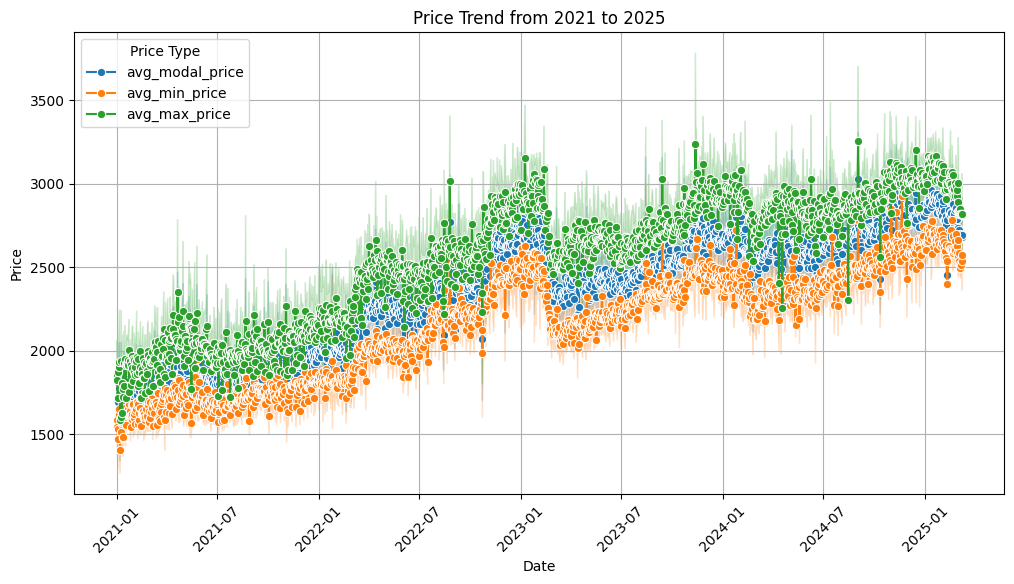

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined with columns: year, month, date, avg_modal_price, avg_min_price, avg_max_price, etc.

# Rename 'date' column to 'day' for compatibility with pd.to_datetime
df.rename(columns={'date': 'day'}, inplace=True)

# Create a datetime column using year, month, and day
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])

# Sort the DataFrame by the new datetime column
df = df.sort_values('datetime')

# Melt DataFrame for Seaborn, using 'datetime' as the id variable
df_melted = df.melt(id_vars=['datetime'], 
                    value_vars=['avg_modal_price', 'avg_min_price', 'avg_max_price'],
                    var_name='Price Type', value_name='Price')

# Plot the price trend over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='datetime', y='Price', hue='Price Type', marker='o')
plt.title("Price Trend from 2021 to 2025")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(title="Price Type")
plt.grid(True)
plt.show()


In [14]:
import pandas as pd
import plotly.express as px

# Assuming df is already defined with the appropriate columns: year, month, date, avg_modal_price, avg_min_price, avg_max_price, etc.

# Create a datetime column using year, month, and date
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])

# Sort the DataFrame by the new datetime column
df = df.sort_values('datetime')

# Melt DataFrame to long format for plotting
df_melted = df.melt(id_vars=['datetime'], 
                    value_vars=['avg_modal_price', 'avg_min_price', 'avg_max_price'],
                    var_name='Price Type', value_name='Price')

# Create an interactive line plot with Plotly Express
fig = px.line(df_melted, x='datetime', y='Price', color='Price Type', markers=True,
              title="Price Trend from 2021 to 2025")

fig.update_layout(xaxis_title="Date", yaxis_title="Price")
fig.show()


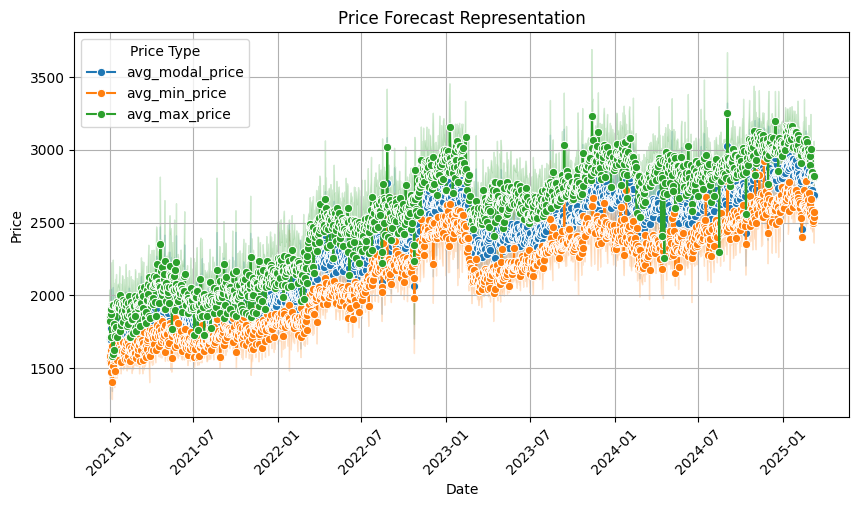

In [15]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt DataFrame for Seaborn
df_melted = df.melt(id_vars=['datetime'], value_vars=['avg_modal_price', 'avg_min_price', 'avg_max_price'],
                     var_name='Price Type', value_name='Price')

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_melted, x='datetime', y='Price', hue='Price Type', marker='o')

plt.title("Price Forecast Representation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(title="Price Type")
plt.grid(True)
plt.show()

In [16]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# --- Time-based Features ---
# Combine year, month, and date to create a proper datetime column.
df['date_parsed'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str),
    errors='coerce'
)

# Extract quarter from the datetime column.
df['quarter'] = df['date_parsed'].dt.quarter

# Create a time trend feature by sorting on the new datetime column.
df = df.sort_values('date_parsed')
df['time_trend'] = range(len(df))

# --- Price Spread Features ---
# Difference between maximum and minimum prices.
df['price_spread'] = df['avg_max_price'] - df['avg_min_price']

# Deviation of the modal price from the average of min and max prices.
df['modal_deviation'] = df['avg_modal_price'] - ((df['avg_min_price'] + df['avg_max_price']) / 2)

# --- Rolling/Lag Features ---
# Create a lag feature for the modal price (lag of 1 period).
df['modal_price_lag1'] = df['avg_modal_price'].shift(1)

# Create a rolling average feature (using a window of 3 periods).
df['rolling_modal_mean'] = df['avg_modal_price'].rolling(window=3).mean()

# --- Categorical Aggregations ---
# Aggregate by district for modal price mean and standard deviation.
district_agg = df.groupby('district_name_enc')['avg_modal_price'].agg(['mean', 'std']).rename(
    columns={'mean': 'district_modal_mean', 'std': 'district_modal_std'}
)
df = df.merge(district_agg, left_on='district_name_enc', right_index=True, how='left')

# Aggregate by commodity for modal price mean and standard deviation.
commodity_agg = df.groupby('commodity_name_enc')['avg_modal_price'].agg(['mean', 'std']).rename(
    columns={'mean': 'commodity_modal_mean', 'std': 'commodity_modal_std'}
)
df = df.merge(commodity_agg, left_on='commodity_name_enc', right_index=True, how='left')

# Optional: Check the head of the DataFrame to see new features.
df.head()


avg_modal_price  avg_min_price  avg_max_price  month  year  day  \
30500          2250.00        1950.00        2350.00      1  2021    1   
9411           1607.60        1534.00        1683.00      1  2021    1   
24427          1524.00        1398.75        1642.88      1  2021    1   
3894           1495.00        1495.00        1495.00      1  2021    1   
28007          1611.67        1466.67        1700.00      1  2021    1   

       district_name_enc  commodity_name_enc  state_name_enc   datetime  ...  \
30500               1367               30501           30501 2021-01-01  ...   
9411                1493               30501           30501 2021-01-01  ...   
24427               1234               30501           30501 2021-01-01  ...   
3894                 877               30501           30501 2021-01-01  ...   
28007               1186               30501           30501 2021-01-01  ...   

      quarter  time_trend  price_spread  modal_deviation  modal_price_lag1  \
30500       1           0        400.00          100.000               NaN   
9411        1           1        149.00           -0.900            2250.0   
24427       1           2        244.13            3.185            1607.6   
3894        1           3          0.00            0.000            1524.0   
28007       1           4        233.33           28.335            1495.0   

       rolling_modal_mean  district_modal_mean  district_modal_std  \
30500                 NaN          2377.544047          406.403036   
9411                  NaN          2328.756810          387.196111   
24427         1793.866667          2210.680956          352.246637   
3894          1542.200000          2216.118956          358.890806   
28007         1543.556667          2218.177660          356.058707   

       commodity_modal_mean  commodity_modal_std  
30500           2345.651458           454.634363  
9411            2345.651458           454.634363  
24427           2345.651458           454.634363  
3894            2345.651458           454.634363  
28007           2345.651458           454.634363  

[5 rows x 21 columns]

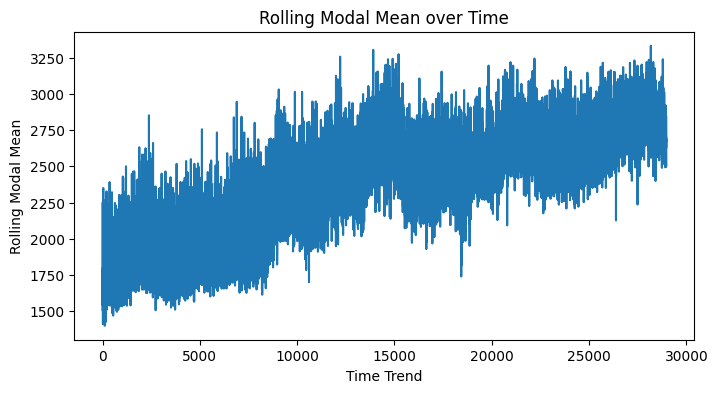

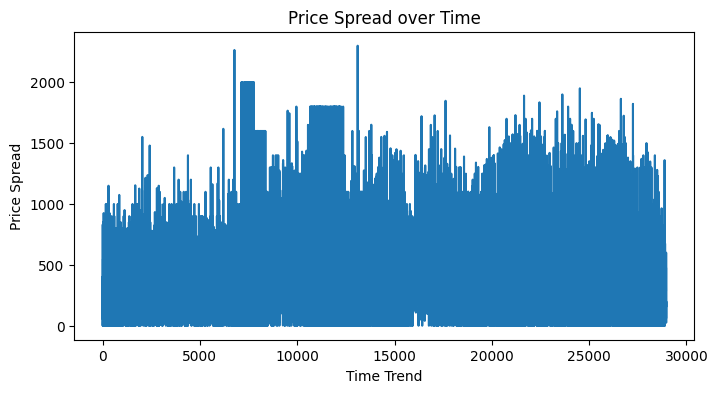

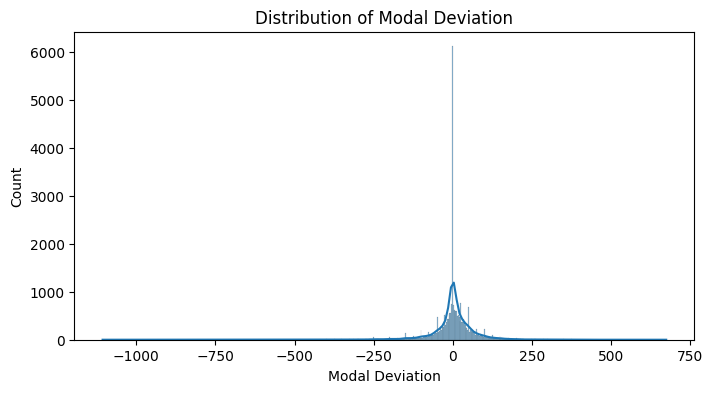

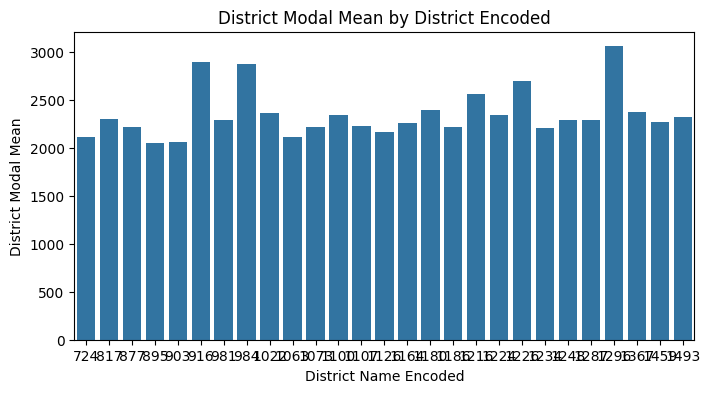

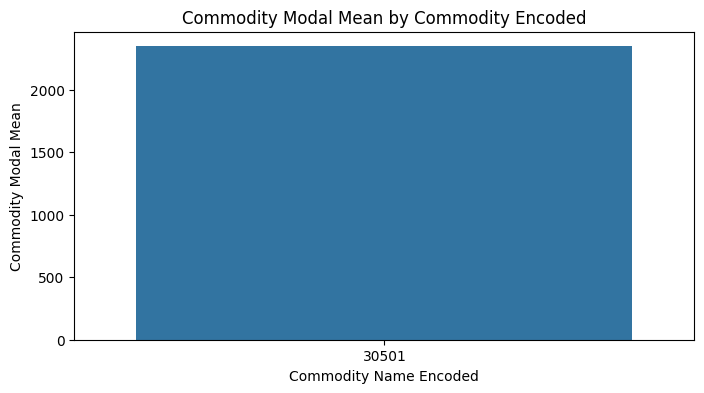

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Line Plot of Rolling Modal Mean over time_trend
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='time_trend', y='rolling_modal_mean')
plt.title("Rolling Modal Mean over Time")
plt.xlabel("Time Trend")
plt.ylabel("Rolling Modal Mean")
plt.show()

# 2. Line Plot of Price Spread over time_trend
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='time_trend', y='price_spread')
plt.title("Price Spread over Time")
plt.xlabel("Time Trend")
plt.ylabel("Price Spread")
plt.show()

# 3. Distribution Plot of modal_deviation
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='modal_deviation', kde=True)
plt.title("Distribution of Modal Deviation")
plt.xlabel("Modal Deviation")
plt.show()

# 4. Bar Plot of district_modal_mean by district_name_enc
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='district_name_enc', y='district_modal_mean')
plt.title("District Modal Mean by District Encoded")
plt.xlabel("District Name Encoded")
plt.ylabel("District Modal Mean")
plt.show()

# 5. Bar Plot of commodity_modal_mean by commodity_name_enc
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='commodity_name_enc', y='commodity_modal_mean')
plt.title("Commodity Modal Mean by Commodity Encoded")
plt.xlabel("Commodity Name Encoded")
plt.ylabel("Commodity Modal Mean")
plt.show()


### feature engineering

In [18]:
df.fillna(method='bfill')

C:\Users\Shiva\AppData\Local\Temp\ipykernel_16820\2831856154.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



avg_modal_price  avg_min_price  avg_max_price  month  year  day  \
30500          2250.00        1950.00        2350.00      1  2021    1   
9411           1607.60        1534.00        1683.00      1  2021    1   
24427          1524.00        1398.75        1642.88      1  2021    1   
3894           1495.00        1495.00        1495.00      1  2021    1   
28007          1611.67        1466.67        1700.00      1  2021    1   
...                ...            ...            ...    ...   ...  ...   
24428          2700.00        2400.00        3000.00      3  2025    9   
16225          2650.00        2466.67        2900.00      3  2025    9   
29134          2525.00        2512.50        2537.50      3  2025    9   
17684          2900.00        2800.00        3000.00      3  2025    9   
2081           2605.00        2550.00        2711.00      3  2025    9   

       district_name_enc  commodity_name_enc  state_name_enc   datetime  ...  \
30500               1367               30501           30501 2021-01-01  ...   
9411                1493               30501           30501 2021-01-01  ...   
24427               1234               30501           30501 2021-01-01  ...   
3894                 877               30501           30501 2021-01-01  ...   
28007               1186               30501           30501 2021-01-01  ...   
...                  ...                 ...             ...        ...  ...   
24428               1287               30501           30501 2025-03-09  ...   
16225               1459               30501           30501 2025-03-09  ...   
29134               1367               30501           30501 2025-03-09  ...   
17684               1180               30501           30501 2025-03-09  ...   
2081                 895               30501           30501 2025-03-09  ...   

      quarter  time_trend  price_spread  modal_deviation  modal_price_lag1  \
30500       1           0        400.00          100.000            2250.0   
9411        1           1        149.00           -0.900            2250.0   
24427       1           2        244.13            3.185            1607.6   
3894        1           3          0.00            0.000            1524.0   
28007       1           4        233.33           28.335            1495.0   
...       ...         ...           ...              ...               ...   
24428       1       28958        600.00            0.000            2140.0   
16225       1       28959        433.33          -33.335            2700.0   
29134       1       28960         25.00            0.000            2650.0   
17684       1       28961        200.00            0.000            2525.0   
2081        1       28962        161.00          -25.500            2900.0   

       rolling_modal_mean  district_modal_mean  district_modal_std  \
30500         1793.866667          2377.544047          406.403036   
9411          1793.866667          2328.756810          387.196111   
24427         1793.866667          2210.680956          352.246637   
3894          1542.200000          2216.118956          358.890806   
28007         1543.556667          2218.177660          356.058707   
...                   ...                  ...                 ...   
24428         2730.000000          2294.377037          404.650494   
16225         2496.666667          2268.269705          352.706462   
29134         2625.000000          2377.544047          406.403036   
17684         2691.666667          2398.373171          427.582487   
2081          2676.666667          2058.293109          357.970943   

       commodity_modal_mean  commodity_modal_std  
30500           2345.651458           454.634363  
9411            2345.651458           454.634363  
24427           2345.651458           454.634363  
3894            2345.651458           454.634363  
28007           2345.651458           454.634363  
...                     ...                  ...  
24428           2345.6

In [19]:
df.drop(columns='date_parsed' , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28963 entries, 30500 to 2081
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   avg_modal_price       28963 non-null  float64       
 1   avg_min_price         28963 non-null  float64       
 2   avg_max_price         28963 non-null  float64       
 3   month                 28963 non-null  int32         
 4   year                  28963 non-null  int32         
 5   day                   28963 non-null  int32         
 6   district_name_enc     28963 non-null  int64         
 7   commodity_name_enc    28963 non-null  int64         
 8   state_name_enc        28963 non-null  int64         
 9   datetime              28963 non-null  datetime64[ns]
 10  quarter               28963 non-null  int32         
 11  time_trend            28963 non-null  int64         
 12  price_spread          28963 non-null  float64       
 13  modal_deviation   

single target - avg_modal_price model

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
import xgboost as xgb
from datetime import datetime
from sklearn.model_selection import train_test_split

# Feature Engineering
X = df[['month', 'year', 'day', 'district_name_enc', 'commodity_name_enc', 'state_name_enc']]
y = df['avg_modal_price']  # Target variable

# # Temporal train-test split (80-20 split)
# split_date = df['date'].iloc[int(len(df)*0.8)]
# X_train = X[X['date'] <= split_date]
# X_test = X[X['date'] > split_date]

# y_train = y[X['date'] <= split_date]
# y_test = y[X['date'] > split_date]

X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)



# Initialize and train XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=50,
    random_state=42
)

model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=False)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print(f"R2: {r2_score(y_test, predictions)}")
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")

# Feature Importance
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importance)

# Example prediction function
def predict_price( month, year,date, district, commodity, state):
    input_data = pd.DataFrame({
        'month': [month],
        'year': [year],
        'day': [date],
        'district_name_enc': [district],
        'commodity_name_enc': [commodity],
        'state_name_enc': [state]
    })
    
    input_data = input_data.drop('date', axis=1)
    return model.predict(input_data)[0]

# Example usage:
# predicted_price = predict_price(15, 3, 2024, 30501, 30501, 981)
# print(f"Predicted Price: {predicted_price}")

R2: 0.84384845700697
MAE: 121.46954985408036
RMSE: 180.37295622677124

Feature Importance:
              feature  importance
1                year    0.780322
3   district_name_enc    0.158031
0               month    0.056069
2                 day    0.005578
4  commodity_name_enc    0.000000
5      state_name_enc    0.000000


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from datetime import datetime
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [22]:
X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [23]:
from skopt.space import Real, Integer, Categorical

# Bayesian Optimization search space
search_spaces = {
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'gamma': Real(0, 0.5),
    'n_estimators': Integer(100, 1000)
}
# XGBoost model template
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    early_stopping_rounds=50,
    random_state=42
)
# Bayesian Optimizer
opt = BayesSearchCV(
    estimator=model,
    search_spaces=search_spaces,
    n_iter=50,  # Number of optimization steps
    cv=3,  # Use time series split in practice
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Fit with Bayesian Optimization
opt.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False)

# Best model
best_model = opt.best_estimator_

# Evaluation
predictions = best_model.predict(X_test)
print(f"Optimized MAE: {mean_absolute_error(y_test, predictions)}")
print(f"Optimized r2: {r2_score(y_test, predictions)}")
print(f"Optimized RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")

# Show best parameters
print("\nBest Parameters:")
for param, value in opt.best_params_.items():
    print(f"{param}: {value}")

# Feature Importance (using optimized model)
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importance)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

Enhanced Multi-Target Regression 

In [24]:
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import r2_score, make_scorer
import xgboost as xgb
from skopt import BayesSearchCV

# Ensure df['date'] is in datetime format if needed:
# df['date'] = pd.to_datetime(df['date'])

X = df[['month', 'year', 'day', 'district_name_enc', 'commodity_name_enc', 'state_name_enc']]
y = df[['avg_modal_price', 'avg_min_price', 'avg_max_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

search_space = {
    'estimator__learning_rate': (0.01, 0.3, 'log-uniform'),
    'estimator__max_depth': (3, 12),
    'estimator__subsample': (0.6, 1.0),
    'estimator__colsample_bytree': (0.6, 1.0),
    'estimator__gamma': (0, 0.5),
    'estimator__n_estimators': (100, 1000)
}

def multioutput_r2_score(y_true, y_pred):
    return np.mean([r2_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

custom_scorer = make_scorer(multioutput_r2_score, greater_is_better=True)

# Removed early_stopping_rounds
model = MultiOutputRegressor(
    xgb.XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',
        random_state=42
    )
)

opt = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=100,
    cv=TimeSeriesSplit(n_splits=3),
    scoring=custom_scorer,
    n_jobs=-1,
    verbose=2
)

opt.fit(X_train.values, y_train.values)

best_model = opt.best_estimator_
predictions = best_model.predict(X_test)
print(f"R² Score: {r2_score(y_test, predictions):.2%}")

def add_temporal_features(df):
    df['day_of_year'] = df['datetime'].dt.dayofyear
    df['days_since_start'] = (df['datetime'] - df['datetime'].min()).dt.days
    df['price_ratio'] = df['avg_max_price'] / df['avg_min_price']
    return df

for lag in [1, 7, 30]:
    df[f'modal_price_lag_{lag}'] = df.groupby(
        ['district_name_enc', 'commodity_name_enc']
    )['avg_modal_price'].shift(lag)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

### clean multioutput regressor <br> LightGBM

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

# Assume df is your DataFrame with both existing and newly created features
target_cols = ['avg_modal_price', 'avg_min_price', 'avg_max_price']
# Drop the datetime column as LightGBM does not support datetime64
X = df.drop(columns=target_cols + ['datetime'])
y = df[target_cols]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Objective function for Hyperopt
def objective(params):
    # Convert params to integers where needed
    params['num_leaves'] = int(params['num_leaves'])
    params['max_depth'] = int(params['max_depth'])
    
    model = MultiOutputRegressor(
        lgb.LGBMRegressor(
            objective='regression',
            n_estimators=75,  # fewer trees for quick tuning
            learning_rate=params['learning_rate'],
            num_leaves=params['num_leaves'],
            max_depth=params['max_depth'],
            random_state=42
        )
    )
    
    # Use 3-fold CV and mean squared error as the metric
    mse = -np.mean(cross_val_score(model, X_train, y_train,
                                   scoring='neg_mean_squared_error', cv=3))
    return {'loss': mse, 'status': STATUS_OK}

# Define search space for hyperparameters
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'num_leaves': hp.quniform('num_leaves', 20, 150, 1),
    'max_depth': hp.quniform('max_depth', 3, 15, 1)
}

# Run Bayesian optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)
best['num_leaves'] = int(best['num_leaves'])
best['max_depth'] = int(best['max_depth'])
print("Best hyperparameters:", best)

# Train final model with the best parameters
final_model = MultiOutputRegressor(
    lgb.LGBMRegressor(
        objective='regression',
        n_estimators=100,
        learning_rate=best['learning_rate'],
        num_leaves=best['num_leaves'],
        max_depth=best['max_depth'],
        random_state=42
    )
)
final_model.fit(X_train, y_train)

# Predict on the validation set
predictions = final_model.predict(X_val)
print("Predictions on validation set:", predictions)
print(f'r2_score {r2_score(predictions , y_val)}')


  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2180                     
[LightGBM] [Info] Number of data points in the train set: 15446, number of used features: 15
[LightGBM] [Info] Start training from score 2346.653828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

updated one

In [34]:
df.dropna(inplace=True)

aarima

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Assuming df already exists with the following columns:
# 'year', 'month', 'date', 'avg_modal_price', 'avg_min_price', 'avg_max_price', etc.

# Ensure a proper datetime index:
df['date_parsed'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['date'].astype(str),
    errors='coerce'
)
df = df.sort_values('date_parsed')
df.set_index('date_parsed', inplace=True)

# Define the target variables
targets = ['avg_modal_price', 'avg_min_price', 'avg_max_price']

# Set the forecast horizon (e.g., forecast 12 periods ahead)
forecast_horizon = 12

# Dictionary to store forecasts for each target
forecasts = {}

# Loop through each target variable and forecast using auto_arima
for target in targets:
    ts = df[target]
    # Fit an auto ARIMA model. Adjust m (seasonal period) as per your data frequency (e.g., m=12 for monthly).
    model = auto_arima(ts, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
    
    # Forecast future values
    fc, conf_int = model.predict(n_periods=forecast_horizon, return_conf_int=True)
    forecasts[target] = (fc, conf_int)
    
    print(f"\nForecast for {target}:")
    print(fc)
    
    # Plot the historical data and forecast
    plt.figure(figsize=(8, 4))
    plt.plot(ts, label='Historical')
    # Create forecast dates based on the index frequency
    forecast_index = pd.date_range(ts.index[-1], periods=forecast_horizon+1, freq='M')[1:]
    plt.plot(forecast_index, fc, label='Forecast')
    plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
    plt.title(f'Forecast for {target}')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.legend()
    plt.show()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject